In [2]:
from quantopian.pipeline import Pipeline
from quantopian.research import run_pipeline
from quantopian.pipeline.filters.morningstar import Q1500US
from quantopian.pipeline.data.sentdex import sentiment
from quantopian.pipeline.data.morningstar import operation_ratios

In [4]:
def make_pipeline():
    testing_factor = operation_ratios.revenue_growth.latest
    universe = (Q1500US() & testing_factor.notnull())
    testing_factor = testing_factor.rank(mask = universe, method = 'average')
    
    pipe = Pipeline(columns = {'testing_factor':testing_factor},
                    screen = universe)
    return pipe

result = run_pipeline(make_pipeline(),start_date='2015-01-01',end_date='2016-01-01')
result.head()

testing_factor
2015-01-02 00:00:00+00:00 Equity(2 [ARNC])            755.0
                          Equity(24 [AAPL])           946.0
                          Equity(41 [ARCB])          1003.0
                          Equity(62 [ABT])            597.0
                          Equity(67 [ADSK])           912.0

In [20]:
assets = result.index.levels[1].unique()
pricing = get_pricing(assets,start_date='2015-01-01',end_date='2016-01-01',fields='open_price')

Dropped 8.7% entries from factor data: 8.7% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Quantiles Statistics


,min,max,mean,std,count,count %
factor_quantile,,,,,,
1,1.0,752.0,373.558531,215.422116,172276,50.015242
2,736.0,1500.0,1119.478582,215.200145,172171,49.984758


Returns Analysis


,3D,10D,20D
Ann. alpha,0.044,0.051,0.054
beta,-0.002,-0.027,0.007
Mean Period Wise Return Top Quantile (bps),3.836,4.450,4.742
Mean Period Wise Return Bottom Quantile (bps),-3.834,-4.452,-4.752
Mean Period Wise Spread (bps),7.670,8.902,9.494


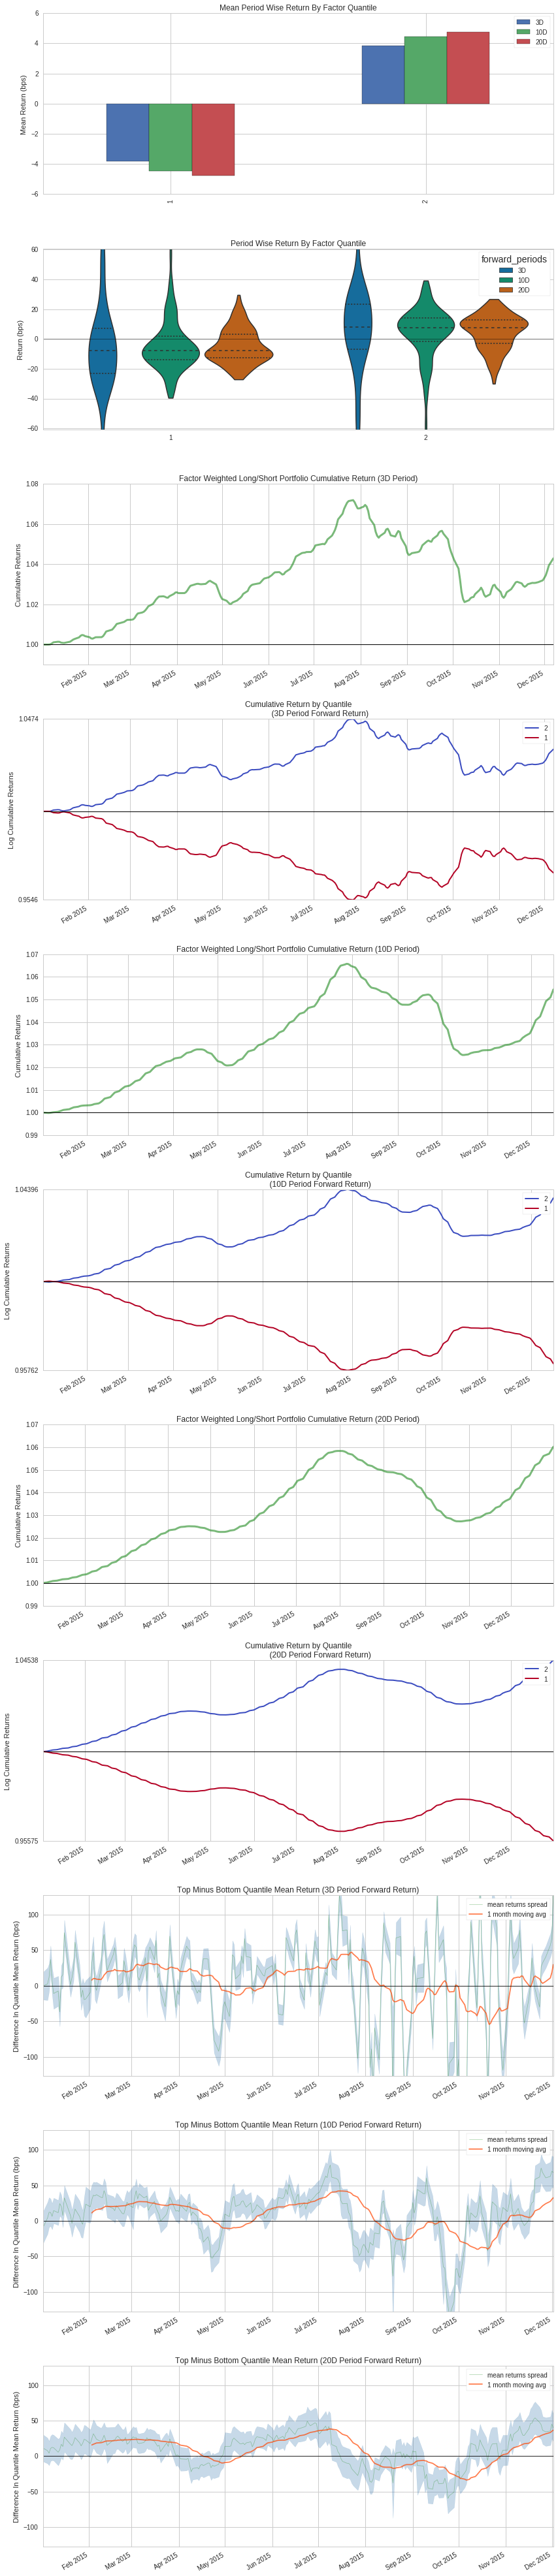

Information Analysis


,3D,10D,20D
IC Mean,0.028,0.039,0.044
IC Std.,0.109,0.115,0.111
Risk-Adjusted IC,0.253,0.339,0.397
t-stat(IC),3.856,5.164,6.054
p-value(IC),0.000,0.000,0.000
IC Skew,-0.583,-0.779,-0.662
IC Kurtosis,0.189,0.756,-0.249


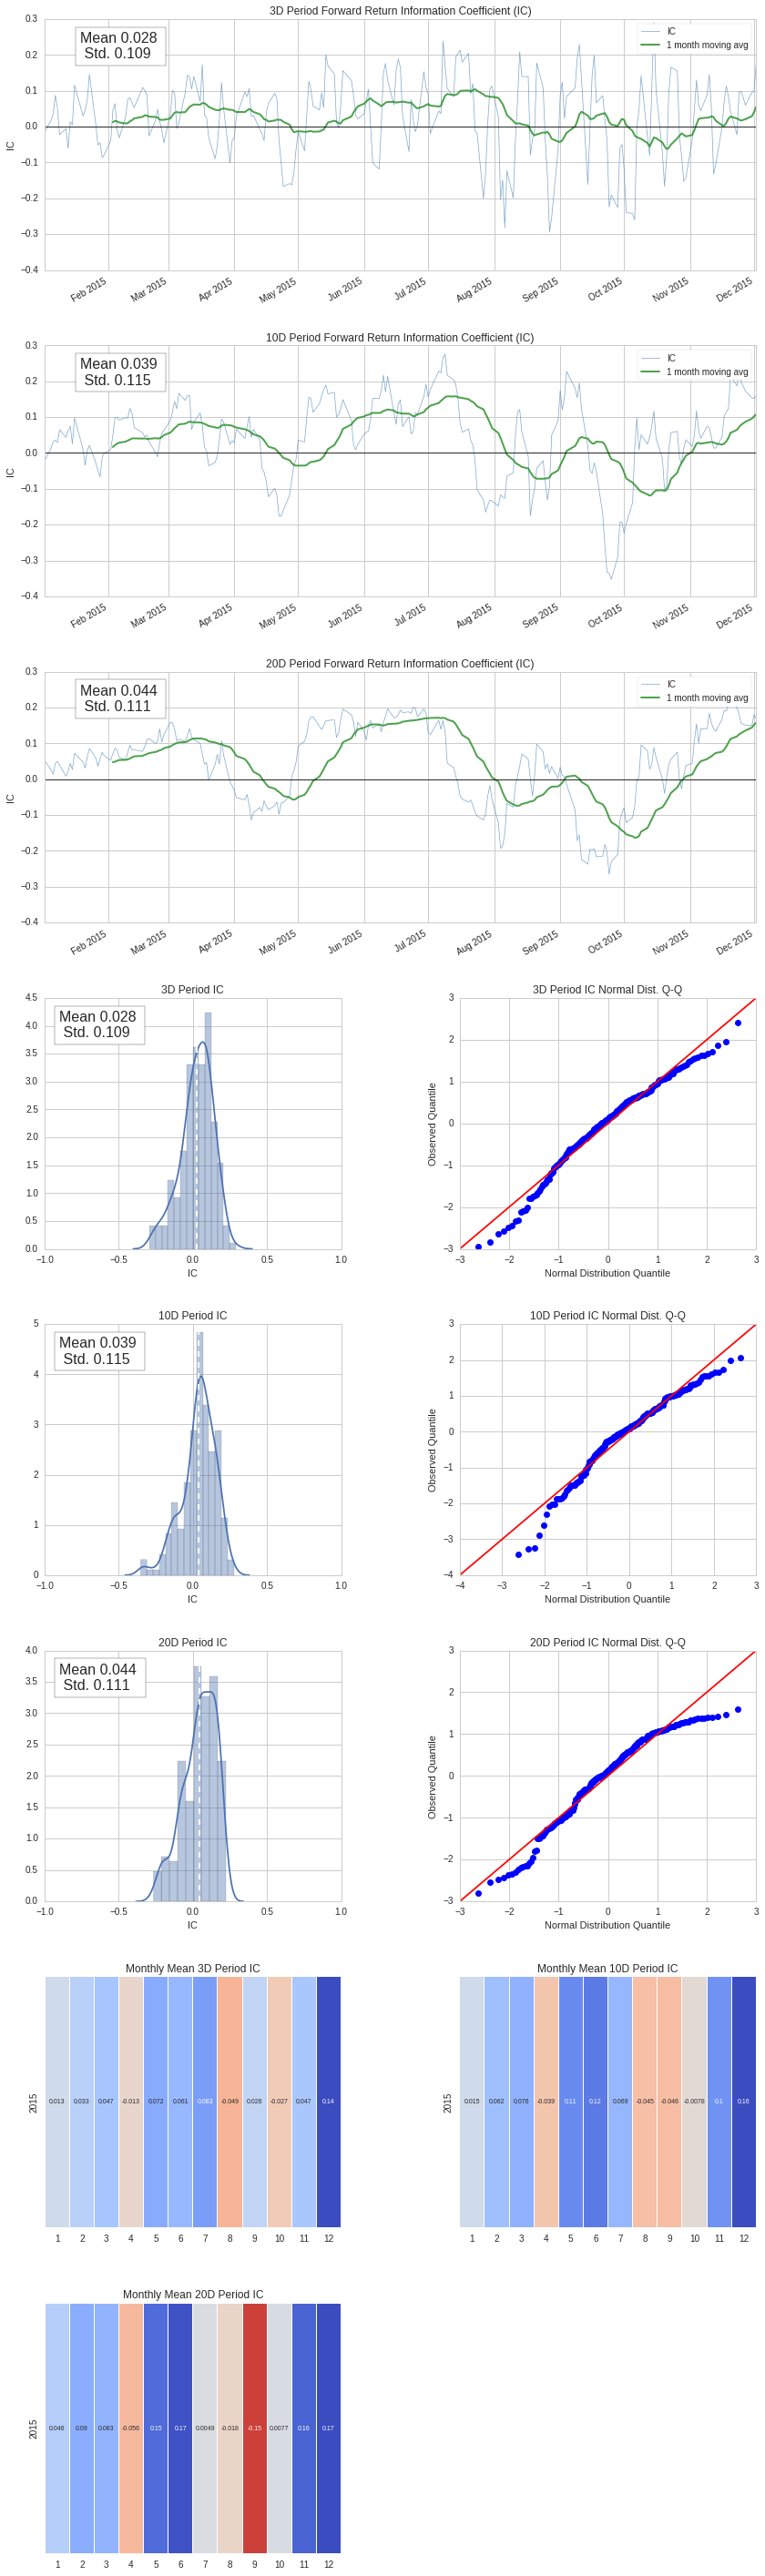

Turnover Analysis


,10D,20D,3D
Quantile 1 Mean Turnover,0.046,0.087,0.015
Quantile 2 Mean Turnover,0.046,0.089,0.015


,3D,10D,20D
Mean Factor Rank Autocorrelation,0.986,0.953,0.906


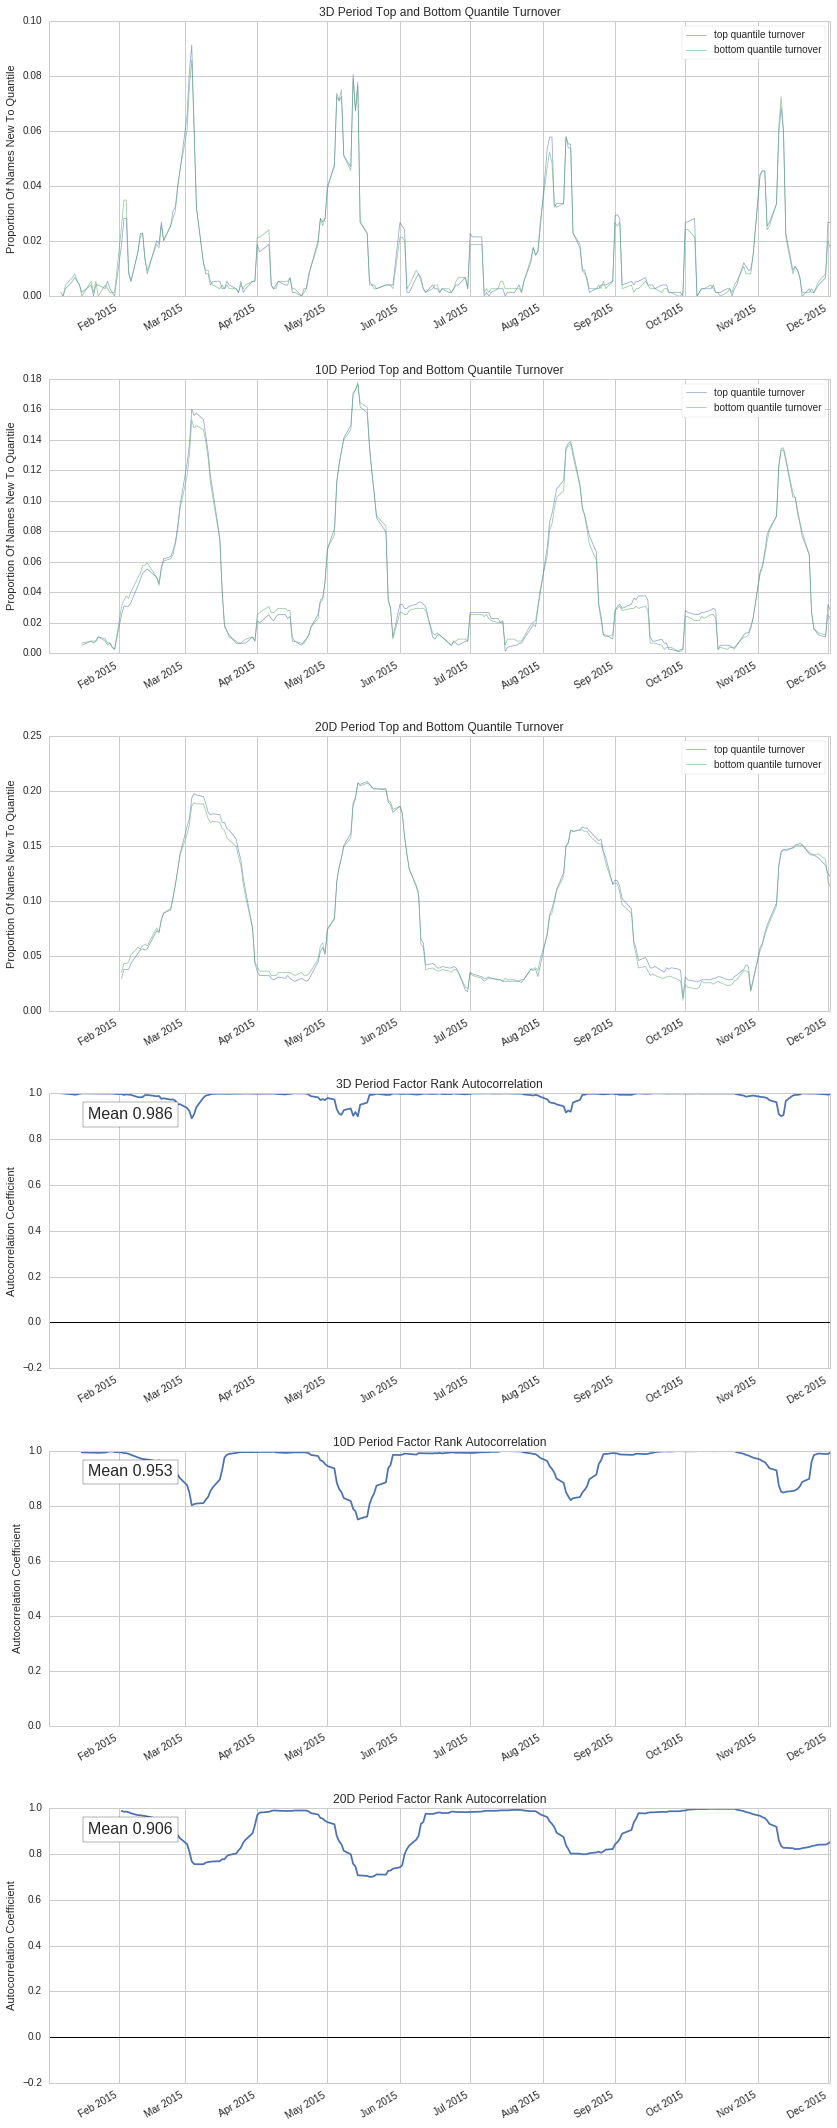

In [21]:
import alphalens
# Ingest and format data
factor_data = alphalens.utils.get_clean_factor_and_forward_returns(factor = result['testing_factor'],
                                                                   prices = pricing,
                                                                   quantiles=2,
                                                                   periods = (3,10,20))

# Run analysis
alphalens.tears.create_full_tear_sheet(factor_data)